<a href="https://colab.research.google.com/github/rubengamarro/practicas-aprendizaje-supervisado/blob/main/Tarea_Calidad_y_preprocesado_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO 1

In [248]:
import pandas as pd

In [249]:
import numpy as np

**Apartado a**

In [250]:
#Cargamos los datos
df = pd.read_csv("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/crx.csv",
                 names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [251]:
#Cambiamos los '?' por espacios vacíos y vemos el número de muestras con atributos desconocidos por cada rasgo
df=df.replace(['?'], np.nan)
df.isnull().sum()

,0
A1,12
A2,12
A3,0
A4,6
A5,6
A6,9
A7,9
A8,0
A9,0
A10,0


In [252]:
#Eliminamos las muestras con atributos desconocidos
df=df.dropna(axis=0)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


**Apartado b**

In [253]:
df.dtypes

,0
A1,object
A2,object
A3,float64
A4,object
A5,object
A6,object
A7,object
A8,float64
A9,object
A10,object


Hay algunos tipos de datos que no son coherentes como el del atributo A2 o A14, que los considera object cuando podemos ver que son claramente valores numéricos. Esto se debe a que, al tener valores vacíos en algunos atributos en el dataframe inicial, el programa ha interpretado que ese atributo no es de tipo numérico, y por eso lo considera de tipo object.

**Apartado c**

In [254]:
#Cambiamos el tipo de dato de los atributos A2 y A14 a numérico
df['A2'] = pd.to_numeric(df['A2'])
df['A14'] = pd.to_numeric(df['A14'])
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [255]:
#Verificamos que interprete los tipos de datos correctamente
df.dtypes

,0
A1,object
A2,float64
A3,float64
A4,object
A5,object
A6,object
A7,object
A8,float64
A9,object
A10,object


Efectivamente, podemos ver como ahora A2 y A14 han cambiado a tipo float64 e int64 respectivamente.

**Apartado d**

In [256]:
#Convertimos las variables categóricas a variables dummies
df_preprocesado=pd.get_dummies(df[df.columns], drop_first=True,
               columns=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'])
df_preprocesado

,A2,A3,A8,A11,A14,A15,A16,A1_b,A4_u,A4_y,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,30.83,0.000,1.25,1,202,0,+,True,True,False,...,False,False,False,True,False,True,True,False,False,False
1,58.67,4.460,3.04,6,43,560,+,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2,24.50,0.500,1.50,0,280,824,+,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,27.83,1.540,3.75,5,100,3,+,True,True,False,...,False,False,False,True,False,True,True,True,False,False
4,20.17,5.625,1.71,0,120,0,+,True,True,False,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260,0,-,True,False,True,...,False,False,False,False,False,False,False,False,False,False
686,22.67,0.750,2.00,2,200,394,-,False,True,False,...,False,False,False,True,False,False,True,True,False,False
687,25.25,13.500,2.00,1,200,1,-,False,False,True,...,False,False,False,False,False,False,True,True,False,False
688,17.92,0.205,0.04,0,280,750,-,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [257]:
#Obtenemos la nueva lista de rasgos
etiquetas_rasgos = np.concatenate((df_preprocesado.iloc[:, 0:6].columns,
                    df_preprocesado.iloc[:, 7:].columns))
etiquetas_rasgos

array(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_b', 'A4_u', 'A4_y',
       'A5_gg', 'A5_p', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i',
       'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_dd',
       'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_t',
       'A10_t', 'A12_t', 'A13_p', 'A13_s'], dtype=object)

En primer lugar, hemos transformado las variables categóricas a dummies, esto se hace para poder tratar las variables categóricas como variables numéricas y poder así trabajar con los datos. Además, hemos eliminado la primera columna de cada atributo para que no haya correlación entre rasgos. Despúes, hemos obtenido la nueva lista de rasgos, sacando de esta lista a nuestra clase deseada (A16).

**Apartado e**

In [258]:
#Dividimos el conjunto en un 75% train y 25% test
from sklearn.model_selection import train_test_split

X = np.concatenate((df_preprocesado.iloc[:, 0:6].values,
                    df_preprocesado.iloc[:, 7:].values), axis=1)
y = df_preprocesado.loc[:, 'A16'].values
X_ent, X_test, y_ent, y_test =\
    train_test_split(X, y,
                     test_size=0.2,
                     random_state=10,
                     stratify=y)

**Apartado f**

In [259]:
from sklearn.preprocessing import StandardScaler
escaladorEstandar = StandardScaler()
X_ent_std = escaladorEstandar.fit_transform(X_ent)
X_test_std = escaladorEstandar.transform(X_test)

**Apartado g**

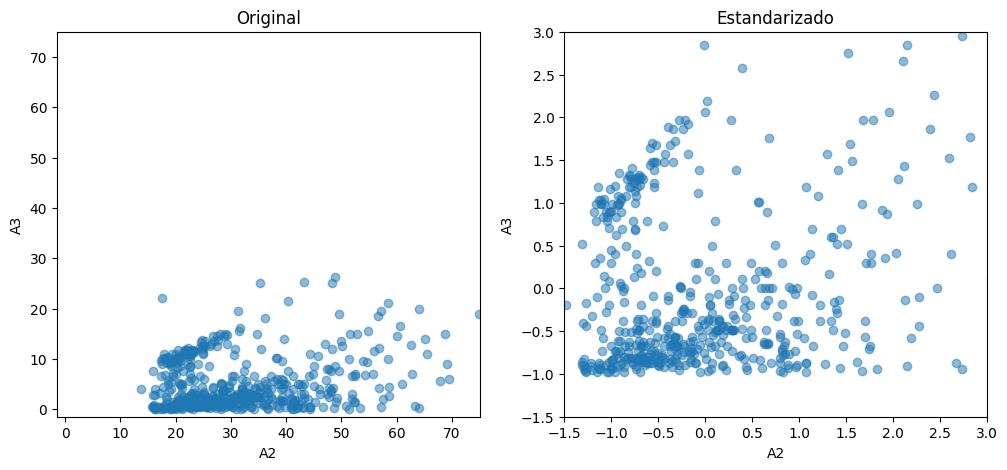

In [260]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X_ent[:, 0], X_ent[:, 1], alpha=0.5)
ax[0].set_title("Original")
ax[0].set_xlabel("A2")
ax[0].set_ylabel("A3")
ax[0].set_xlim(-1.5, 75)
ax[0].set_ylim(-1.5, 75)

ax[1].scatter(X_ent_std[:, 0], X_ent_std[:, 1], alpha=0.5)
ax[1].set_title("Estandarizado")
ax[1].set_xlabel("A2")
ax[1].set_ylabel("A3")
ax[1].set_xlim(-1.5, 3)
ax[1].set_ylim(-1.5, 3)
plt.show()

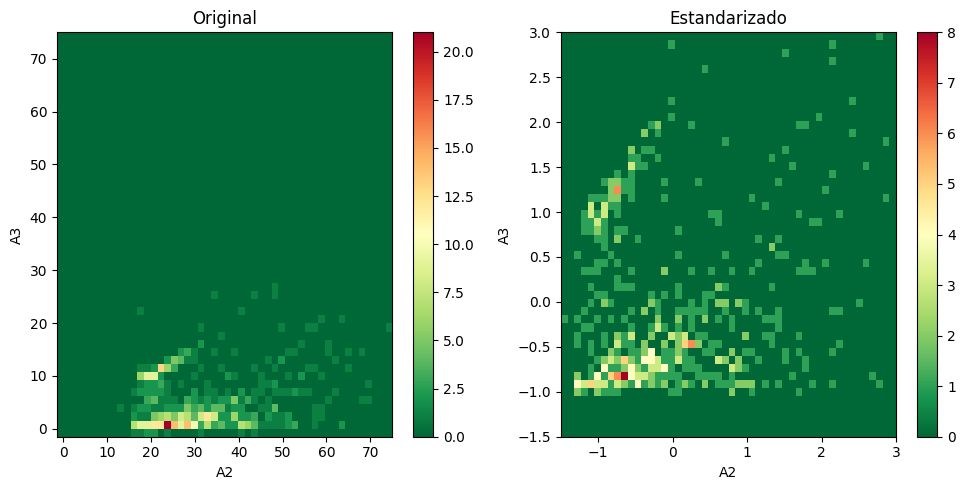

In [261]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

# Ajustamos el rango de valores de cada eje a [0, 200] y vamos usar otro mapa
# de colores, el RdYlGn_r
h1 = ax[0].hist2d(X_ent[:,0], X_ent[:,1],range=[[-1.5, 75], [-1.5, 75]], bins=50,
             cmap = "RdYlGn_r")
ax[0].set_xlabel('A2')
ax[0].set_ylabel('A3')
ax[0].set_title('Original')
fig.colorbar(h1[3], ax=ax[0])
h2 = ax[1].hist2d(X_ent_std[:,0], X_ent_std[:,1], range=[[-1.5, 3], [-1.5, 3]], bins=50, cmap = "RdYlGn_r")
ax[1].set_xlabel('A2')
ax[1].set_ylabel('A3')
ax[1].set_title('Estandarizado')
fig.colorbar(h2[3], ax=ax[1])
plt.show()

**Apartado h**

In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_ent, y_ent)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

In [263]:
knn_escalado = KNeighborsClassifier(n_neighbors=5)
knn_escalado.fit(X_ent_std, y_ent)
y_pred_escalado= knn_escalado.predict(X_test_std)
acc_escalado = accuracy_score(y_test, y_pred_escalado)

In [264]:
print(f"Exactitud con datos sin escalar: {acc_original:.4f}")
print(f"Exactitud con datos escalados: {acc_escalado:.4f}")

Exactitud con datos sin escalar: 0.6260
Exactitud con datos escalados: 0.7939


Como podemos ver, hay una gran diferencia en la exactitud del test entre los datos sin escalar y escalados. Esto se debe a que el escalado mejora la representación de los datos en el espacio, permitiendo al modelo KNN encontrar sus vecinos más representativos y hacer una clasificación más exacta.

#EJERCICIO 2

**Apartado a**

In [265]:
#Cargamos los datos
df2 = pd.read_csv("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/crx.csv",
                 names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
df2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [266]:
#Cambiamos los '?' por espacios vacíos
df2=df2.replace(['?'], np.nan)

In [267]:
#Creamos una lista de los atributos numéricos y otra de los no numéricos
atr_numericos = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
atr_no_numericos = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [268]:
from sklearn.impute import SimpleImputer
import numpy as np

#Rellenamos los datos incompletos por la media en el caso de los atributos numéricos
#y por la media en el caso de atributos no numéricos
completador_num = SimpleImputer(missing_values=np.nan, strategy='mean')
df2[atr_numericos] = completador_num.fit_transform(df2[atr_numericos])
completador_no_num = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df2[atr_no_numericos] = completador_no_num.fit_transform(df2[atr_no_numericos])
df2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0.0,f,g,260.0,0.0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2.0,t,g,200.0,394.0,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1.0,t,g,200.0,1.0,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0.0,f,g,280.0,750.0,-


**Apartado b**

In [269]:
df2.dtypes

,0
A1,object
A2,float64
A3,float64
A4,object
A5,object
A6,object
A7,object
A8,float64
A9,object
A10,object


Todas las columnas están correctas

In [270]:
#Convertimos las variables categóricas a variables dummies
df2_preprocesado=pd.get_dummies(df2[df2.columns], drop_first=True,
               columns=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'])
df2_preprocesado

,A2,A3,A8,A11,A14,A15,A16,A1_b,A4_u,A4_y,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,30.83,0.000,1.25,1.0,202.0,0.0,+,True,True,False,...,False,False,False,True,False,True,True,False,False,False
1,58.67,4.460,3.04,6.0,43.0,560.0,+,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2,24.50,0.500,1.50,0.0,280.0,824.0,+,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,27.83,1.540,3.75,5.0,100.0,3.0,+,True,True,False,...,False,False,False,True,False,True,True,True,False,False
4,20.17,5.625,1.71,0.0,120.0,0.0,+,True,True,False,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0.0,260.0,0.0,-,True,False,True,...,False,False,False,False,False,False,False,False,False,False
686,22.67,0.750,2.00,2.0,200.0,394.0,-,False,True,False,...,False,False,False,True,False,False,True,True,False,False
687,25.25,13.500,2.00,1.0,200.0,1.0,-,False,False,True,...,False,False,False,False,False,False,True,True,False,False
688,17.92,0.205,0.04,0.0,280.0,750.0,-,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [271]:
#Dividimos el conjunto en un 75% train y 25% test
from sklearn.model_selection import train_test_split

X = np.concatenate((df2_preprocesado.iloc[:, 0:6].values,
                    df2_preprocesado.iloc[:, 7:].values), axis=1)
y = df2_preprocesado.loc[:, 'A16'].values
X_ent, X_test, y_ent, y_test =\
    train_test_split(X, y,
                     test_size=0.2,
                     random_state=10,
                     stratify=y)

In [272]:
#Realizamos el escalado estándar
from sklearn.preprocessing import StandardScaler
escaladorEstandar = StandardScaler()
X_ent_std = escaladorEstandar.fit_transform(X_ent)
X_test_std = escaladorEstandar.transform(X_test)

**Apartado c**

In [273]:
#Implementamos la clase SBS
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimador, l_rasgos_obj,
                 scoring=accuracy_score):
        self.scoring = scoring
        self.estimador = clone(estimador)
        self.l_rasgos_obj = l_rasgos_obj

    def ajustar(self, X_ent, X_test, y_ent, y_test):
        # Contador de cantidad de rasgos actuales:
        k_rasgos_act = X_ent.shape[1]
        # Vector con los índices de los rasgos actuales:
        self.indices_ = tuple(range(k_rasgos_act))
        # Lista con los subconjuntos de rasgos elegidos para cada cantidad de
        # rasgos: mejores con l rasgos, con l-1, con l-2, etc:
        self.subconjuntos_ = [self.indices_]
        # Cálculo del rendimiento con el conjunto inicial de rasgos:
        rendimiento = self._calcular_rendimiento(X_ent, y_ent,
                                 X_test, y_test, self.indices_)
        # Almacenamos rendimiento inicial en la lista de rendimientos:
        self.rendimientos_ = [rendimiento]
        while k_rasgos_act > self.l_rasgos_obj:
            # Inciamos a vacío las listas de subconjuntos de rasgos con sus
            # rendimientos asociados:
            lista_rend_p = []
            subconjuntos_p = []

            # Probamos todas las combinaciones con 1 rasgo menos de los actuales
            for p in combinations(self.indices_, r=k_rasgos_act - 1):
                rendimiento_p = self._calcular_rendimiento(X_ent, y_ent,
                                         X_test, y_test, p)
                lista_rend_p.append(rendimiento_p)
                subconjuntos_p.append(p)

            # Determinarmos cuál ha sido el mejor subconjunto de rasgos:
            mejor_p = np.argmax(lista_rend_p)

            # Anotamos como mejor para esta cantidad de rasgos a mejor_p:
            self.indices_ = subconjuntos_p[mejor_p]
            self.subconjuntos_.append(self.indices_)
            self.rendimientos_.append(lista_rend_p[mejor_p])
            k_rasgos_act -= 1

        return self

    # Calcula el rendimiento de test del estimador utilizando únicamente
    # los rasgos marcados/definidos en el vector "indices"
    def _calcular_rendimiento(self, X_ent, y_train, X_test, y_test, indices):
        self.estimador.fit(X_ent[:, indices], y_train)
        y_pred = self.estimador.predict(X_test[:, indices])
        rendimiento = self.scoring(y_test, y_pred)
        return rendimiento

In [274]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
neuronaLogistica = LogisticRegression()
sbs = SBS(neuronaLogistica, l_rasgos_obj=1)
sbs.ajustar(X_ent_std, X_test_std, y_ent, y_test)

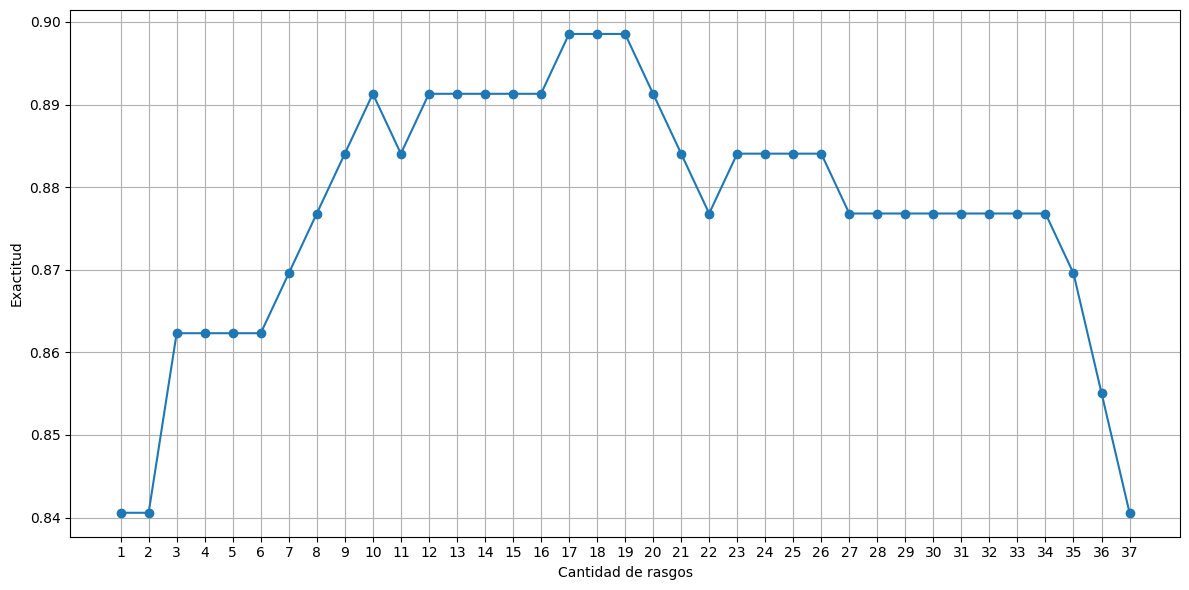

In [275]:
cantidadRasgos = [len(subconj) for subconj in sbs.subconjuntos_]
plt.figure(figsize=(12, 6))
plt.plot(cantidadRasgos, sbs.rendimientos_, marker='o')
plt.xticks(np.arange(1,38))
plt.ylabel('Exactitud')
plt.xlabel('Cantidad de rasgos')
plt.grid()
plt.tight_layout()
plt.show()

Podemos ver que la cantidad ótpima de rasgos, con la cual el test tendría más exactitud es con 17, 18, o 19 rasgos.

**Apartado d**

In [276]:
from sklearn.ensemble import RandomForestClassifier

# Calculamos relevancias con un bosque aleatorio:
bosque = RandomForestClassifier(n_estimators=200,
                                random_state=10)
bosque.fit(X_ent, y_ent)
relevancias = bosque.feature_importances_
# [::-1] invierte un vector, así ordenamos de mayor a menor relevancia:
indices = np.argsort(relevancias)[::-1]
indices

array([32,  5,  2,  3,  1, 33,  4,  0, 23, 34, 26,  6, 20, 11, 10, 22, 30,
        7,  8, 36, 12, 35, 18, 15, 25, 16, 19, 13, 14, 28,  9, 27, 31, 17,
       29, 24, 21])

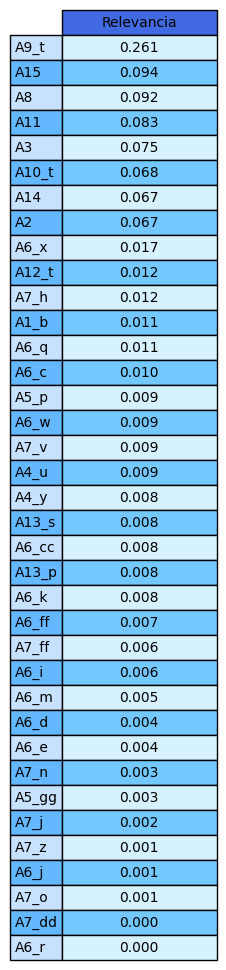

In [277]:
fig, ax = plt.subplots(1,1,figsize=(2, 3))
ax.axis('tight')
ax.axis('off')

celdasFormateadas = []
celdasColores =  []
cabeceraFilColor= []
colorPar=False
for fila in relevancias[indices]:
  # Formato de celdas con 3 decimales
    celdasFormateadas.append(['%1.3f' % fila])
    # Formato filas pares:
    if (colorPar == True):
      celdasColores.append(["#73C8FF"])
      cabeceraFilColor.append("#63B8FF")
    # Formato filas impares:
    else:
      celdasColores.append(["#D6F2FF"])
      cabeceraFilColor.append("#C6E2FF")
    colorPar = not(colorPar)

tabla=ax.table(cellText=celdasFormateadas, cellColours=celdasColores,
               colLabels=["Relevancia"], colColours=['royalblue'],
               rowLabels=etiquetas_rasgos[indices], rowColours=cabeceraFilColor,
               loc="center", cellLoc="center")
tabla.scale(1, 1.5)
plt.show()

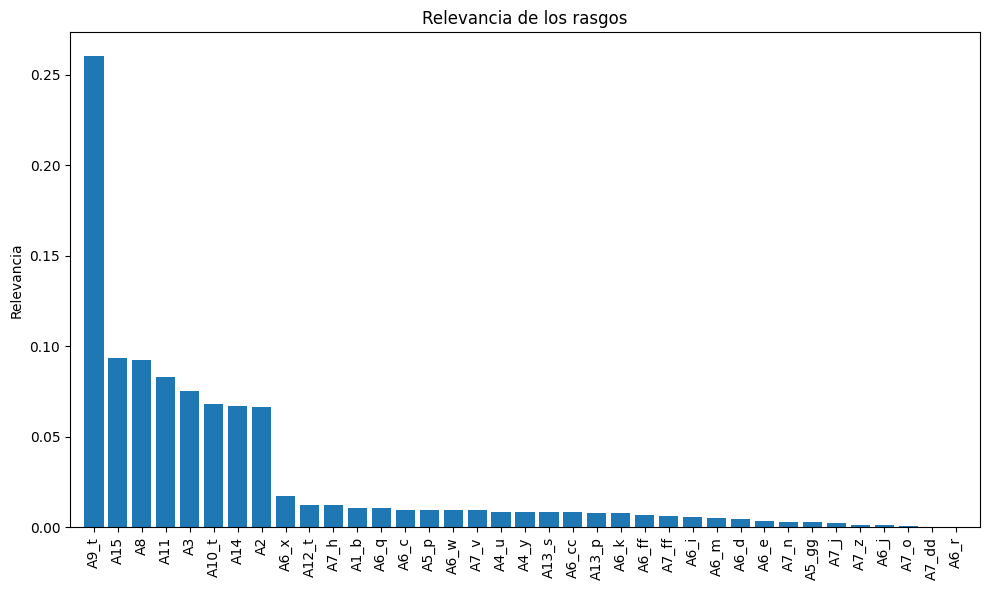

In [278]:
plt.figure(figsize=(10, 6))
plt.title('Relevancia de los rasgos')
plt.bar(range(X_ent.shape[1]),
        relevancias[indices],
        align='center')
# Mostramos etiquetas eje horizontal:
plt.xticks(range(X_ent.shape[1]),
           etiquetas_rasgos[indices], rotation=90)
plt.xlim([-1, X_ent.shape[1]])
plt.ylabel("Relevancia")
plt.tight_layout()
plt.show()

Como podemos ver en la gráfica y en la tabla, el rasgo más relevante es 'A9_t'.

**Apartado e**

In [279]:
indMejoresRasgos = np.where(relevancias > 0.05)[0]
nombresMejoresRasgos = etiquetas_rasgos[indMejoresRasgos]
print(nombresMejoresRasgos)

['A2' 'A3' 'A8' 'A11' 'A14' 'A15' 'A9_t' 'A10_t']


In [280]:
bosque.fit(X_ent_std, y_ent)
print('Exactitud en entrenamiento:',
      bosque.score(X_ent_std, y_ent))
print('Exactitud en test:',
      bosque.score(X_test_std, y_test))

Exactitud en entrenamiento: 1.0
Exactitud en test: 0.855072463768116


In [281]:
bosque.fit(X_ent_std[:, indMejoresRasgos], y_ent)
print('Exactitud en entrenamiento:',
      bosque.score(X_ent_std[:, indMejoresRasgos], y_ent))
print('Exactitud en test:',
      bosque.score(X_test_std[:, indMejoresRasgos], y_test))

Exactitud en entrenamiento: 1.0
Exactitud en test: 0.8623188405797102


Como podemos ver, la exactitud en test tomando únicamente los rasgos que tienen una significatividad superior al 0.05 es superior, aunque la diferencia es muy pequeña. Que la diferencia sea tan pequeña se puede deber al mismo motivo que vimos en clase, que el conjunto de muestras que estamos usando es muy pequeño. Lo que está claro es que la exactitud mejora cuando tomamos solo los rasgos más significativos, aunque haya poca diferencia.

#EJERCICIO 3

**Apartado a**

In [282]:
import pandas as pd

In [283]:
poblacion = pd.read_excel("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/PoblacionINE.xlsx")

In [284]:
df_total = poblacion.iloc[9:61]
df_total.columns = ["Provincia", "Personas"]
df_total

,Provincia,Personas
9,04 Almería,730430
10,11 Cádiz,1249873
11,14 Córdoba,777622
12,18 Granada,925046
13,21 Huelva,527254
14,23 Jaén,627568
15,29 Málaga,1696955
16,41 Sevilla,1950056
17,22 Huesca,223995
18,44 Teruel,134259


In [285]:
df_española = poblacion.iloc[62:114]
df_española.columns = ["Provincia", "Personas"]
df_española

,Provincia,Personas
62,04 Almería,575979
63,11 Cádiz,1197787
64,14 Córdoba,755364
65,18 Granada,856272
66,21 Huelva,478386
67,23 Jaén,610687
68,29 Málaga,1424384
69,41 Sevilla,1872545
70,22 Huesca,195514
71,44 Teruel,119287


In [286]:
df_extranjera = poblacion.iloc[115:167]
df_extranjera.columns = ["Provincia", "Personas"]
df_extranjera

,Provincia,Personas
115,04 Almería,154451
116,11 Cádiz,52086
117,14 Córdoba,22258
118,18 Granada,68774
119,21 Huelva,48868
120,23 Jaén,16881
121,29 Málaga,272571
122,41 Sevilla,77511
123,22 Huesca,28481
124,44 Teruel,14972


**Apartado b**

In [287]:
viviendas = pd.read_excel("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/ViviendasINE.xlsx")

In [288]:
vivienda_total = viviendas.iloc[7:59]
vivienda_total.columns = ["Provincia", "Viviendas"]
vivienda_total

,Provincia,Viviendas
7,04 Almería,434546
8,11 Cádiz,648306
9,14 Córdoba,414088
10,18 Granada,573717
11,21 Huelva,320916
12,23 Jaén,373720
13,29 Málaga,996566
14,41 Sevilla,913014
15,22 Huesca,171853
16,44 Teruel,125711


In [289]:
vivienda_principal = viviendas.iloc[60:112]
vivienda_principal.columns = ["Provincia", "Viviendas"]
vivienda_principal

,Provincia,Viviendas
60,04 Almería,275726
61,11 Cádiz,468478
62,14 Córdoba,299409
63,18 Granada,368011
64,21 Huelva,201365
65,23 Jaén,246169
66,29 Málaga,660344
67,41 Sevilla,723494
68,22 Huesca,90254
69,44 Teruel,54625


In [290]:
vivienda_no_principal = viviendas.iloc[113:165]
vivienda_no_principal.columns = ["Provincia", "Viviendas"]
vivienda_no_principal

,Provincia,Viviendas
113,04 Almería,158820
114,11 Cádiz,179828
115,14 Córdoba,114679
116,18 Granada,205706
117,21 Huelva,119551
118,23 Jaén,127551
119,29 Málaga,336222
120,41 Sevilla,189520
121,22 Huesca,81599
122,44 Teruel,71086


**Apartado c**

In [291]:
df_concatenado = pd.concat(
    [df_total[['Provincia']].reset_index(drop=True)] +
    [df.drop(columns=['Provincia']).reset_index(drop=True) for df in [df_total, df_española, df_extranjera, vivienda_total, vivienda_principal, vivienda_no_principal]],
    axis=1,
)

df_concatenado = df_concatenado.set_index('Provincia')
df_concatenado

,Personas,Personas,Personas,Viviendas,Viviendas,Viviendas
Provincia,,,,,,
04 Almería,730430,575979,154451,434546,275726,158820
11 Cádiz,1249873,1197787,52086,648306,468478,179828
14 Córdoba,777622,755364,22258,414088,299409,114679
18 Granada,925046,856272,68774,573717,368011,205706
21 Huelva,527254,478386,48868,320916,201365,119551
23 Jaén,627568,610687,16881,373720,246169,127551
29 Málaga,1696955,1424384,272571,996566,660344,336222
41 Sevilla,1950056,1872545,77511,913014,723494,189520
22 Huesca,223995,195514,28481,171853,90254,81599


In [292]:
df_concatenado.shape

(52, 6)

Obtenemos el dataframe con 52 filas y las provincias como índice

#EJERCICIO 4

**Apartado a**

In [293]:
sp500=pd.read_csv("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/DatosHistoricos_SP500.csv")
sp500

,Date,Close/Last,Volume,Open,High,Low
0,07/06/2023,4411.59,--,4422.62,4422.62,4385.05
1,07/05/2023,4446.82,--,4442.04,4454.06,4436.61
2,07/03/2023,4455.59,--,4450.48,4456.46,4442.29
3,06/30/2023,4450.38,--,4422.44,4458.48,4422.44
4,06/29/2023,4396.44,--,4374.94,4398.39,4371.97
...,...,...,...,...,...,...
2533,07/12/2013,1680.19,--,1675.26,1680.19,1672.33
2534,07/11/2013,1675.02,--,1657.41,1676.63,1657.41
2535,07/10/2013,1652.62,--,1651.56,1657.92,1647.66
2536,07/09/2013,1652.32,--,1642.89,1654.18,1642.89


In [294]:
eurostoxx50=pd.read_csv("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/DatosHistoricos_Eurostoxx50.csv")
eurostoxx50

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-03-30,4177.669922,4207.759766,4160.350098,4181.029785,4181.029785,0.0
1,2007-04-02,4177.310059,4191.759766,4163.770020,4189.549805,4189.549805,0.0
2,2007-04-03,4199.540039,4248.069824,4199.540039,4246.299805,4246.299805,0.0
3,2007-04-04,4252.709961,4261.830078,4242.049805,4261.830078,4261.830078,0.0
4,2007-04-05,4259.979980,4274.169922,4253.790039,4271.540039,4271.540039,0.0
...,...,...,...,...,...,...,...
4088,2023-06-30,4354.950195,4409.500000,4346.399902,4399.089844,4399.089844,39197800.0
4089,2023-07-03,4401.029785,4420.009766,4397.759766,4398.149902,4398.149902,24607100.0
4090,2023-07-04,4398.049805,4412.540039,4389.520020,4390.990234,4390.990234,18592200.0
4091,2023-07-05,4388.299805,4388.299805,4342.870117,4350.709961,4350.709961,24348900.0


In [295]:
eurusd=pd.read_csv('https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/DatosHistoricos_EURUSD.csv')
eurusd

,Date,Close/Last,Volume,Open,High,Low
0,07/06/2023,1.0888,NaN,1.0888,1.0895,1.0882
1,07/05/2023,1.0842,NaN,1.0851,1.0858,1.0842
2,07/04/2023,1.0878,NaN,1.0877,1.0891,1.0875
3,07/03/2023,1.0907,NaN,1.0911,1.0917,1.0903
4,07/02/2023,1.0912,NaN,1.0910,1.0918,1.0900
...,...,...,...,...,...,...
1277,03/13/2019,1.1305,NaN,1.1286,1.1318,1.1278
1278,03/12/2019,1.1286,NaN,1.1286,1.1292,1.1284
1279,03/11/2019,1.1247,NaN,1.1247,1.1255,1.1244
1280,03/10/2019,1.1231,NaN,1.1238,1.1239,1.1231


**Apartado b**

In [296]:
#Convertimos la columna "Date" a formato datetime
sp500["Date"] = pd.to_datetime(sp500["Date"])
eurostoxx50["Date"] = pd.to_datetime(eurostoxx50["Date"])
eurusd["Date"] = pd.to_datetime(eurusd["Date"])

In [297]:
#Renombramos las columnas para poder unirlas facilmente
def renombrar(df, nombre_anterior, nombre_nuevo):
    return df.rename(columns={nombre_anterior: nombre_nuevo})[["Date", nombre_nuevo]]

sp500 = renombrar(sp500, "Close/Last", "CloseSP500")
eurostoxx50 = renombrar(eurostoxx50, "Close", "CloseEuroStoxx50")
eurusd = renombrar(eurusd, "Close/Last", "CloseEURUSD")

In [298]:
cierre_df = pd.merge(sp500, eurostoxx50, on="Date").merge(eurusd, on="Date")
cierre_df = cierre_df.dropna(axis=0)
cierre_df

,Date,CloseSP500,CloseEuroStoxx50,CloseEURUSD
0,2023-07-06,4411.59,4223.089844,1.0888
1,2023-07-05,4446.82,4350.709961,1.0842
2,2023-07-03,4455.59,4398.149902,1.0907
3,2023-06-30,4450.38,4399.089844,1.0912
4,2023-06-29,4396.44,4354.689941,1.0875
...,...,...,...,...
1013,2019-03-14,2808.48,3342.030029,1.1305
1014,2019-03-13,2810.92,3323.449951,1.1305
1015,2019-03-12,2791.52,3303.949951,1.1286
1016,2019-03-11,2783.30,3304.439941,1.1247


**Apartado c**

In [299]:
cierre_df["CloseEuroStoxx50USD"] = cierre_df["CloseEuroStoxx50"] * cierre_df["CloseEURUSD"]
cierre_df

,Date,CloseSP500,CloseEuroStoxx50,CloseEURUSD,CloseEuroStoxx50USD
0,2023-07-06,4411.59,4223.089844,1.0888,4598.100222
1,2023-07-05,4446.82,4350.709961,1.0842,4717.039740
2,2023-07-03,4455.59,4398.149902,1.0907,4797.062098
3,2023-06-30,4450.38,4399.089844,1.0912,4800.286838
4,2023-06-29,4396.44,4354.689941,1.0875,4735.725311
...,...,...,...,...,...
1013,2019-03-14,2808.48,3342.030029,1.1305,3778.164948
1014,2019-03-13,2810.92,3323.449951,1.1305,3757.160170
1015,2019-03-12,2791.52,3303.949951,1.1286,3728.837915
1016,2019-03-11,2783.30,3304.439941,1.1247,3716.503602
